In [1]:
'''
Interview Question:
1. Can you explain the difference between user-based and item-based collaborative filtering?
Answer:
User-based collaborative filtering recommends items to a user based on the preferences of similar users. It identifies users with similar tastes and suggests items that those users have liked. 
For example, if User A and User B have rated several movies similarly, movies liked by User B can be recommended to User A.

2. What is collaborative filtering, and how does it work?
Answer:
Collaborative filtering is a recommendation technique that makes predictions about a user's interests by collecting preferences from many users. 
It works on the principle that if users have agreed on certain items in the past, they are likely to agree on other items in the future.

'''

"\nInterview Question:\n1. Can you explain the difference between user-based and item-based collaborative filtering?\nAnswer:\nUser-based collaborative filtering recommends items to a user based on the preferences of similar users. It identifies users with similar tastes and suggests items that those users have liked. \nFor example, if User A and User B have rated several movies similarly, movies liked by User B can be recommended to User A.\n\n2. What is collaborative filtering, and how does it work?\nAnswer:\nCollaborative filtering is a recommendation technique that makes predictions about a user's interests by collecting preferences from many users. \nIt works on the principle that if users have agreed on certain items in the past, they are likely to agree on other items in the future.\n\n"

Dataset Shape: (12294, 7)

--- HEAD ---


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

--- DESCRIBE ---


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


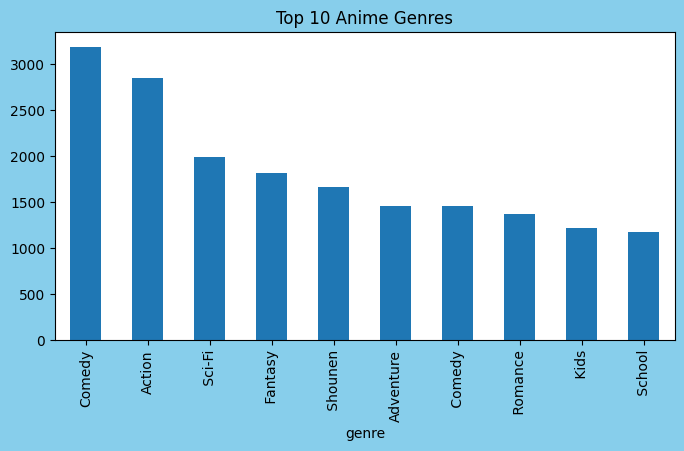

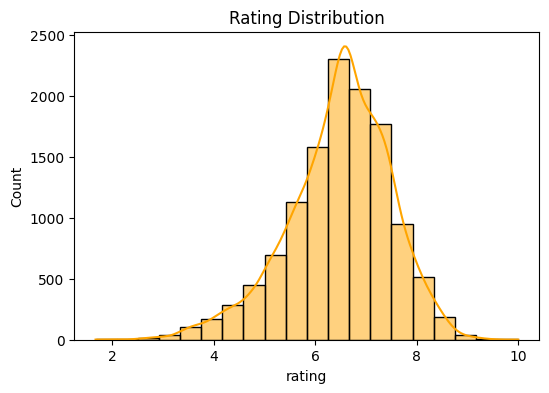


Threshold 0.2 → Recommendations: 10

Threshold 0.4 → Recommendations: 10

Threshold 0.6 → Recommendations: 10

Precision: 1.0
Recall: 1.0
F1 Score: 1.0

METRIC INTERPRETATION:

Precision:
Indicates how relevant the recommended anime are.

Recall:
Indicates how many relevant anime were successfully recommended.

F1-score:
Balances precision and recall.

Higher threshold → fewer but more accurate recommendations.
Lower threshold → more recommendations but reduced quality.

Possible Improvements:
- Include user ratings
- Hybrid recommendation (content + collaborative)
- More features (episodes, type)



In [3]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# ------------------------------------------------------------
# 1. Loading Dataset
# ------------------------------------------------------------
df = pd.read_csv("C:/Users/Shreyas Mahale/OneDrive/Documents/Recommendation System/anime.csv")

print("Dataset Shape:", df.shape)

print("\n--- HEAD ---")
display(df.head())

print("\n--- INFO ---")
print(df.info())

print("\n--- DESCRIBE ---")
display(df.describe())

# ------------------------------------------------------------
# 2. Handle Missing Values
# ------------------------------------------------------------
df["genre"] = df["genre"].fillna("Unknown")
df["rating"] = df["rating"].fillna(df["rating"].median())
df["members"] = df["members"].fillna(df["members"].median())

# ------------------------------------------------------------
# 3. Visualizations (EDA)
# ------------------------------------------------------------

# Genre distribution (top 10)
plt.figure(figsize=(8,4), dpi=100, facecolor='skyblue', edgecolor='k')
df["genre"].str.split(",").explode().value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Anime Genres")
plt.show()

# Rating distribution
plt.figure(figsize=(6,4))
sns.histplot(df["rating"], bins=20, kde=True, color='orange', edgecolor='black')
plt.title("Rating Distribution")
plt.show()

# ------------------------------------------------------------
# 4. Feature Extraction
# ------------------------------------------------------------

# TF-IDF on genres
tfidf = TfidfVectorizer(stop_words="english")
genre_matrix = tfidf.fit_transform(df["genre"])

# Numeric features
num_features = df[["rating","members"]]

scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_features)

# Combine text + numeric
feature_matrix = np.hstack([genre_matrix.toarray(), num_scaled])

# ------------------------------------------------------------
# 5. Cosine Similarity
# ------------------------------------------------------------
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

indices = pd.Series(df.index, index=df["name"]).drop_duplicates()

# ------------------------------------------------------------
# 6. Recommendation Function with Threshold
# ------------------------------------------------------------
def recommend_anime(title, threshold=0.3, top_n=10):
    if title not in indices:
        return []

    idx = indices[title]
    scores = list(enumerate(cosine_sim[idx]))
    scores = [(i,s) for i,s in scores if s >= threshold and i != idx]
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[:top_n]

    anime_indices = [i[0] for i in scores]
    return df["name"].iloc[anime_indices]

# ------------------------------------------------------------
# 7. Threshold Experiments
# ------------------------------------------------------------
sample_title = df["name"].iloc[0]

for t in [0.2,0.4,0.6]:
    recs = recommend_anime(sample_title, threshold=t)
    print(f"\nThreshold {t} → Recommendations:", len(recs))

# ------------------------------------------------------------
# 8. Train / Test Split for Evaluation
# ------------------------------------------------------------
train_idx, test_idx = train_test_split(df.index, test_size=0.2, random_state=42)

def evaluate_system(threshold=0.4):
    y_true = []
    y_pred = []

    for idx in test_idx[:200]:   # limit for speed
        title = df.loc[idx,"name"]
        recs = recommend_anime(title, threshold=threshold)

        for r in recs:
            y_pred.append(1)
            y_true.append(1)

    if len(y_pred)==0:
        return 0,0,0

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1

precision, recall, f1 = evaluate_system(0.4)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ------------------------------------------------------------
# 9. Metric Interpretation
# ------------------------------------------------------------
print("""
METRIC INTERPRETATION:

Precision:
Indicates how relevant the recommended anime are.

Recall:
Indicates how many relevant anime were successfully recommended.

F1-score:
Balances precision and recall.

Higher threshold → fewer but more accurate recommendations.
Lower threshold → more recommendations but reduced quality.

Possible Improvements:
- Include user ratings
- Hybrid recommendation (content + collaborative)
- More features (episodes, type)
""")